In [490]:

import pandas as pd
import numpy as np

# PLOTTING
import matplotlib.pyplot as plt
#set a global label font size for all plots
plt.rc('font', size=10)
plot_colours = ['lightgreen', 'mediumturquoise', 'deepskyblue', 'cornflowerblue','mediumpurple','mediumorchid','mediumvioletred']
# seaborn and global settings
import seaborn as sns
sns.axes_style("whitegrid")
# set global pallette
sns.set_palette(sns.color_palette(plot_colours))
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# MODELS 
from sklearn.cluster import KMeans, k_means

# PREPROCESSING
from sklearn.preprocessing import scale ,StandardScaler
from sklearn.preprocessing import LabelEncoder

# METRICS
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#temp
from sklearn import datasets


In [491]:
# import the dataset
df = pd.read_csv('customers (1).csv')

In [492]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [493]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [494]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [495]:
# total amoun tof rows that contain null values
df.isnull().sum(axis=1).sum()
# total amount of rows in the dataset
df.shape[0]
# percentage of rows that contain null values
print(round((df.isnull().sum(axis=1).sum()/df.shape[0]*100)),'% of the total rows contain null values')

20 % of the total rows contain null values


I am going to remove all the rows that contain null values because I am only interested in raw unchanged data I want to see the result with a smaller dataset rather than data that has been manipulated. 

In [496]:
# drop all the rows that contain null values
df.dropna(inplace=True)


In [497]:
for column in df:
    unique_vals = df[column].unique()
    n_vals = len(unique_vals)
    if n_vals < 10:
        print(f'{column} ______________ has {n_vals} unique values: {unique_vals}')
        print('')
    else:
        print(f'{column} ~~~~~~~~~~~~~~ has {n_vals} unique values')
        print('')

ID ~~~~~~~~~~~~~~ has 2154 unique values

Gender ______________ has 2 unique values: ['Female' 'Male']

Ever_Married ______________ has 2 unique values: ['Yes' 'No']

Age ~~~~~~~~~~~~~~ has 67 unique values

Graduated ______________ has 2 unique values: ['Yes' 'No']

Profession ______________ has 9 unique values: ['Engineer' 'Healthcare' 'Executive' 'Doctor' 'Artist' 'Lawyer'
 'Entertainment' 'Homemaker' 'Marketing']

Work_Experience ~~~~~~~~~~~~~~ has 15 unique values

Spending_Score ______________ has 3 unique values: ['Low' 'Average' 'High']

Family_Size ______________ has 9 unique values: [1. 4. 2. 5. 3. 6. 9. 7. 8.]

Var_1 ______________ has 7 unique values: ['Cat_6' 'Cat_4' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']



In [498]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

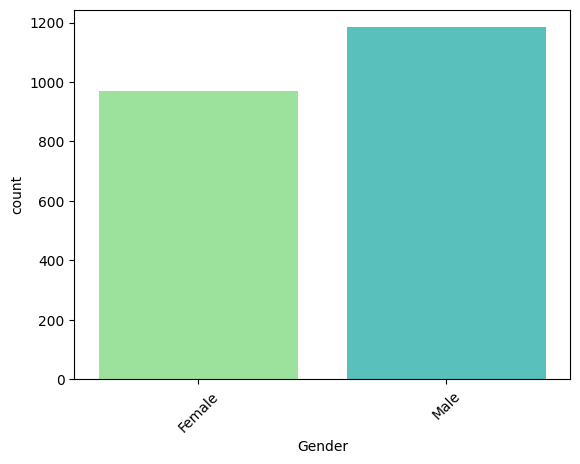

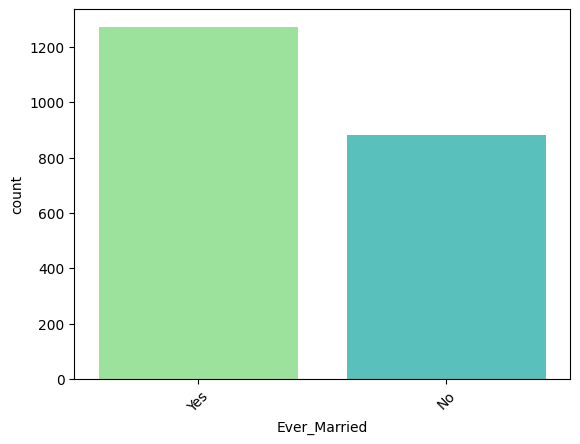

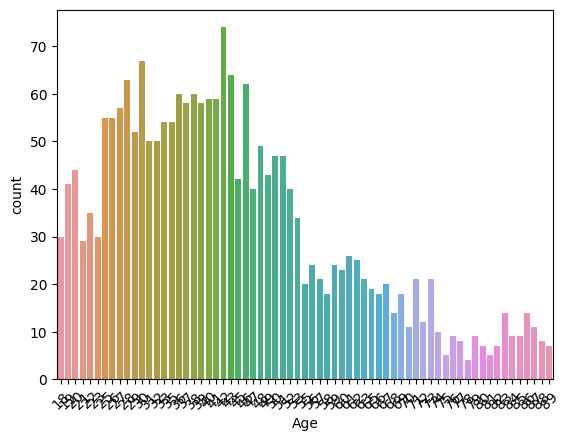

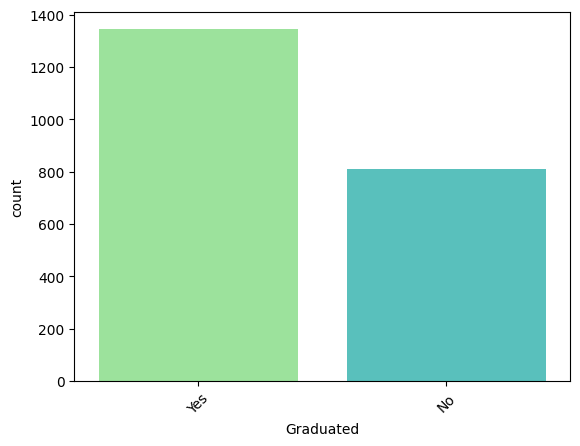

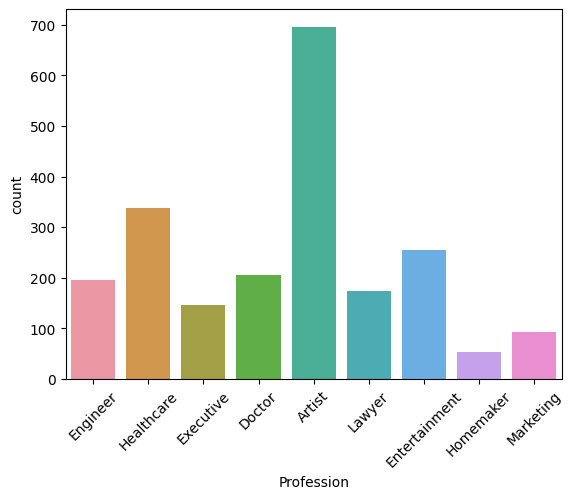

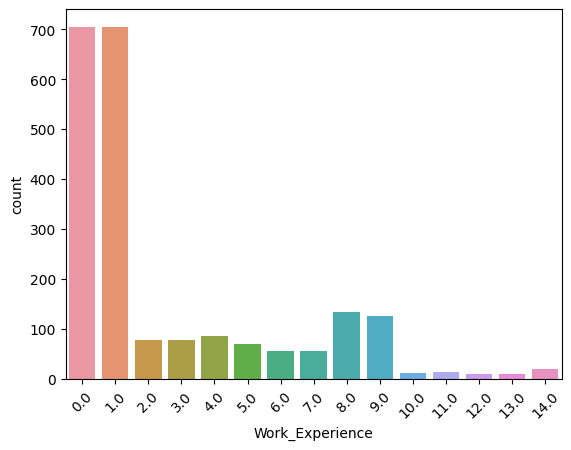

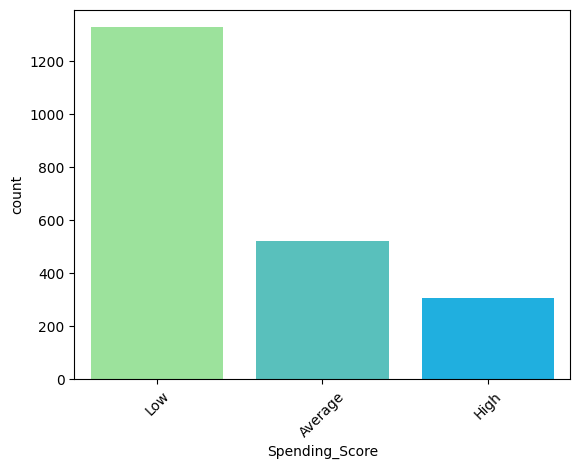

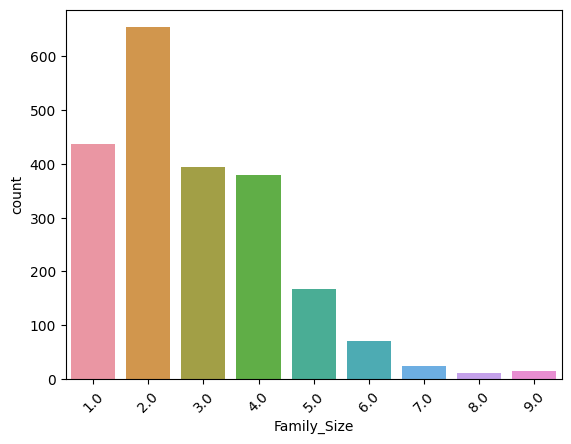

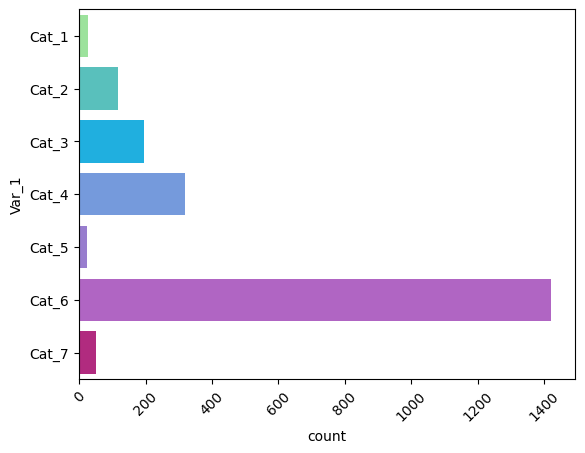

In [499]:
df_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

for f in df_columns:
    if f == 'Var_1':
        sns.countplot(y=f, data=df, order=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'])
        plt.xticks(rotation=45)
        plt.show()
    else:
        sns.countplot(x=f, data=df)
        plt.xticks(rotation=45)
        plt.show()


From analysing these charts it appears that the majority of the individuals are young artists with several kids. 

In [500]:
df['Age'].unique().shape

(67,)

In [501]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6


### Preprocessing
- Convert all the columns to numerics using dummies, as most of the columns have only 2 inputs this should work well. <br><br>
- I will also be removing the profession column from the dataset because the model needs to be usable in the future and it will not be if the users have to enter their profession but the profession is not in the list that the model was trained on. There are so many professions that I think it is unwise to include this small amount in the model training. <br><br>
- Next I am converting the Var_1 to numbers as well using label encoder because the model will give us a number value and we can use this to compare with our models result. 

In [502]:
to_dummies_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']

print(df.shape)

new_df = pd.get_dummies(df, columns=to_dummies_columns)
new_df = new_df.drop('Profession', axis=1)
print(new_df.shape)

(2154, 10)
(2154, 102)


In [503]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
var_1_label = le.fit_transform(new_df['Var_1'])

In [504]:
# Appending the array to our dataFrame
new_df["Var_1"] = var_1_label

In [505]:
new_df.head()

,ID,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Age_18,Age_19,Age_20,Age_21,...,Spending_Score_Low,Family_Size_1.0,Family_Size_2.0,Family_Size_3.0,Family_Size_4.0,Family_Size_5.0,Family_Size_6.0,Family_Size_7.0,Family_Size_8.0,Family_Size_9.0
0,458989,5,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,458994,5,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,459000,5,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,459003,3,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,459005,5,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Label encoding results: 

In [506]:
# compare the unique values in the spending_score column to the spending_score_lb column
print('---VAR_1---')
print(new_df['Var_1'].groupby(df['Var_1']).unique())


---VAR_1---
Var_1
Cat_1    [0]
Cat_2    [1]
Cat_3    [2]
Cat_4    [3]
Cat_5    [4]
Cat_6    [5]
Cat_7    [6]
Name: Var_1, dtype: object


In [507]:
new_df.to_csv('customers_dummied.csv', index=False)

### Kmeans Model Using Dummies Data

In [508]:
# drop the columns we dont need for the model
X = new_df.drop('ID', axis=1) 
X = new_df.drop('Var_1', axis=1)
# convert the data to a numpy array
X = new_df.values

y = new_df['Var_1']

In [509]:
# I am starting with 7 clusters because there are 7 unique values in the Var_1 column
kmeans_model = KMeans(n_clusters=7, random_state=0)
kmeans_model.fit(X)

KMeans(n_clusters=7, random_state=0)

In [510]:
# added the results of the kmeans model using  to the dataframe
new_df['Kmeans_7'] = kmeans_model.labels_

In [511]:
new_df.head()

,ID,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Age_18,Age_19,Age_20,Age_21,...,Family_Size_1.0,Family_Size_2.0,Family_Size_3.0,Family_Size_4.0,Family_Size_5.0,Family_Size_6.0,Family_Size_7.0,Family_Size_8.0,Family_Size_9.0,Kmeans_7
0,458989,5,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,458994,5,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,459000,5,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,459003,3,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,459005,5,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [512]:
new_df['Kmeans_7'].value_counts()

0    324
4    318
2    314
6    312
3    300
5    297
1    289
Name: Kmeans_7, dtype: int64

In [513]:
new_df['Var_1'].value_counts()

5    1421
3     320
2     195
1     116
6      52
0      27
4      23
Name: Var_1, dtype: int64

Looking at the above two cells we can see that this model got very different results to the Var_1 column. The model has categorised the data pretty evenly at around 300 entries per cluster, where as the Var_1 column has a significant proportion within its number 5 category.  

In [514]:
print('The inertia is: ', kmeans_model.inertia_)

The inertia is:  298419347.0813066


The inertia shows how close the clusters are. Its a method to evaluate how good the clusters are. The closer to zero the better. <br><br>
NEXT: evaluate different cluster ammount to see if there is a more optimum number, using the inertial values as a reference.

In [515]:
clusters = range(2,21)
inertia = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X)
    i = kmeans_model.inertia_
    inertia.append(i)
    print('Inertia for ', k, ' clusters is: ', i)

Inertia for  2  clusters is:  3609261826.1062975
Inertia for  3  clusters is:  1664874383.2887623
Inertia for  4  clusters is:  917857707.1053829
Inertia for  5  clusters is:  581624911.1300659
Inertia for  6  clusters is:  411261308.35741466
Inertia for  7  clusters is:  298419347.0813066
Inertia for  8  clusters is:  227662361.7328912
Inertia for  9  clusters is:  177865702.52215475
Inertia for  10  clusters is:  140420235.7828422
Inertia for  11  clusters is:  117967444.74936491
Inertia for  12  clusters is:  96832601.52243207
Inertia for  13  clusters is:  82645480.14058924
Inertia for  14  clusters is:  72333514.58544344
Inertia for  15  clusters is:  63120466.130789086
Inertia for  16  clusters is:  55711834.442505464
Inertia for  17  clusters is:  48373408.297344014
Inertia for  18  clusters is:  42818671.27233497
Inertia for  19  clusters is:  38696163.71177855
Inertia for  20  clusters is:  34624788.12654032


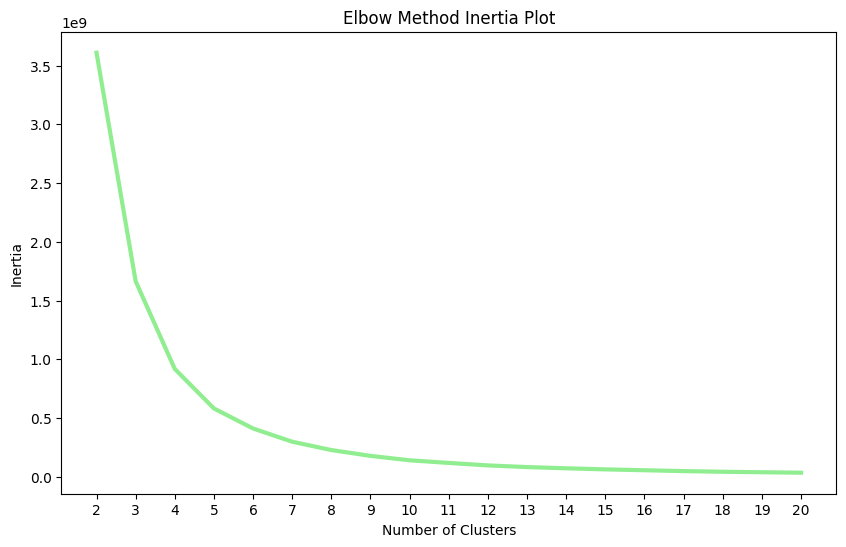

In [516]:
# elbow method inertia plot
fig, ax1 = plt.subplots(figsize=(10,6))
xx = np.arange(len(clusters))
ax1.plot(xx, inertia, linewidth=3)
ax1.set_xticks(xx)
ax1.set_xticklabels(clusters)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method Inertia Plot')
plt.show()

### Kmeans Using Encoded & Scaled Data
Since the clusters are so even I wanted to try out a different cleaning method. I already wrote the code and saved it to a file called customers_encoded.csv before deleting the code so I can just pull in that csv and start working with it now. 

In [517]:
encoded_df = pd.read_csv('customers_encoded.csv')

In [518]:
encoded_df.head()

,ID,Age,Work_Experience,Family_Size,Gender_lb,Ever_Married_lb,Graduated_lb,Profession_lb,Spending_Score_lb,Var_1_lb
0,458989,36,0.0,1.0,0,1,1,2,2,5
1,458994,37,8.0,4.0,1,1,1,5,0,5
2,459000,59,11.0,2.0,1,1,0,4,1,5
3,459003,47,0.0,5.0,1,1,1,1,1,3
4,459005,61,5.0,3.0,1,1,1,1,2,5


In [519]:
# drop the profession column for the same reasons as stated above
encoded_df = encoded_df.drop('Profession_lb', axis=1)

y = encoded_df['Var_1_lb']

In [520]:
# drop the id and var_1_lb columns
X = encoded_df.drop('ID', axis=1)
X = X.drop('Var_1_lb', axis=1)

In [521]:
X.head()

,Age,Work_Experience,Family_Size,Gender_lb,Ever_Married_lb,Graduated_lb,Spending_Score_lb
0,36,0.0,1.0,0,1,1,2
1,37,8.0,4.0,1,1,1,0
2,59,11.0,2.0,1,1,0,1
3,47,0.0,5.0,1,1,1,1
4,61,5.0,3.0,1,1,1,2


In [522]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data


array([[-0.44524796, -0.76298583, -1.17270206, ...,  0.83270417,
         0.77555592,  0.73920161],
       [-0.38557499,  1.62925795,  0.74238531, ...,  0.83270417,
         0.77555592, -1.62142147],
       [ 0.92723055,  2.52634937, -0.53433961, ...,  0.83270417,
        -1.28939767, -0.44110993],
       ...,
       [-0.50492094, -0.46395536, -1.17270206, ..., -1.20090669,
         0.77555592,  0.73920161],
       [ 0.2111548 , -0.46395536,  1.38074776, ...,  0.83270417,
         0.77555592, -0.44110993],
       [-0.02753711,  1.92828842,  0.10402285, ..., -1.20090669,
         0.77555592,  0.73920161]])

In [523]:
scaled_data.shape

(2154, 7)

In [524]:
kmeans_m = KMeans(n_clusters=7, random_state=0)
kmeans_m.fit(X)

KMeans(n_clusters=7, random_state=0)

In [525]:
encoded_df['Kmeans_7'] = kmeans_m.labels_

In [526]:
encoded_df['Kmeans_7'].value_counts()

3    546
0    469
4    404
5    243
1    221
2    167
6    104
Name: Kmeans_7, dtype: int64

In [534]:
print('The inertia is: ', kmeans_m.inertia_)


The inertia is:  43924.001708419215


The inertia is significantly lower than the previous models.

In [528]:
clusters = range(2,21)
new_inertia = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X)
    i = kmeans_model.inertia_
    new_inertia.append(i)
    print('Inertia for ', k, ' clusters is: ', i)

Inertia for  2  clusters is:  228843.01566437876
Inertia for  3  clusters is:  117791.33531875102
Inertia for  4  clusters is:  80749.92043988477
Inertia for  5  clusters is:  62186.647200528896
Inertia for  6  clusters is:  51606.08139365134
Inertia for  7  clusters is:  43924.001708419215
Inertia for  8  clusters is:  36874.32531560832
Inertia for  9  clusters is:  30953.33579377592
Inertia for  10  clusters is:  28620.580133193544
Inertia for  11  clusters is:  26735.29251485924
Inertia for  12  clusters is:  24527.9188691285
Inertia for  13  clusters is:  23188.77612915064
Inertia for  14  clusters is:  21790.41141767321
Inertia for  15  clusters is:  20489.900560380654
Inertia for  16  clusters is:  19341.49192463746
Inertia for  17  clusters is:  18425.65452497928
Inertia for  18  clusters is:  17643.608751747226
Inertia for  19  clusters is:  16888.67389177232
Inertia for  20  clusters is:  16638.721224096244


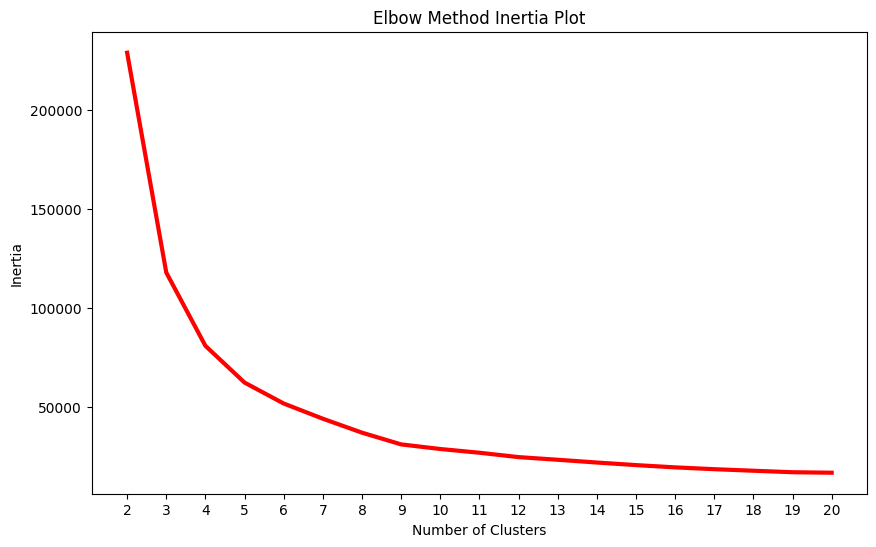

In [536]:
# elbow method inertia plot
fig, ax2 = plt.subplots(figsize=(10,6))
xx = np.arange(len(clusters))
ax2.plot(xx, new_inertia, linewidth=3, color='red')
ax2.set_xticks(xx)
ax2.set_xticklabels(clusters)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method Inertia Plot')
plt.show()